In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [127]:
data = pd.read_csv("15_TitanicSurvival_Prediction.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [129]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [130]:
#Handling Missing Values
data = data.drop(columns = 'Cabin', axis = 1)

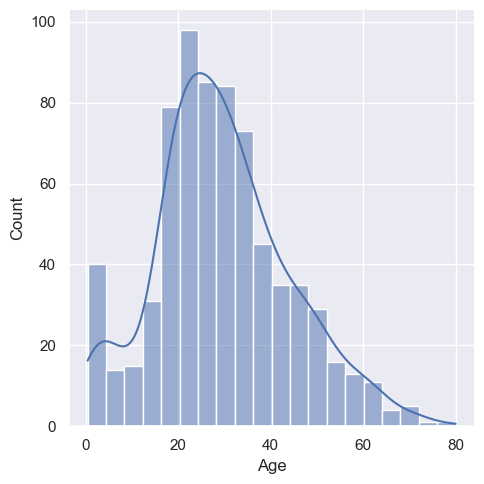

In [131]:
sns.displot(data['Age'], kde = True)
plt.show()

In [132]:
pd.set_option('future.no_silent_downcasting', True)

In [133]:
data['Age'] = data["Age"].fillna(data["Age"].mean())

In [134]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [135]:
data['Embarked'] = data['Embarked'].fillna(data["Embarked"].mode()[0])

In [136]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [137]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [138]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [139]:
#Data Visualization
sns.set_theme()

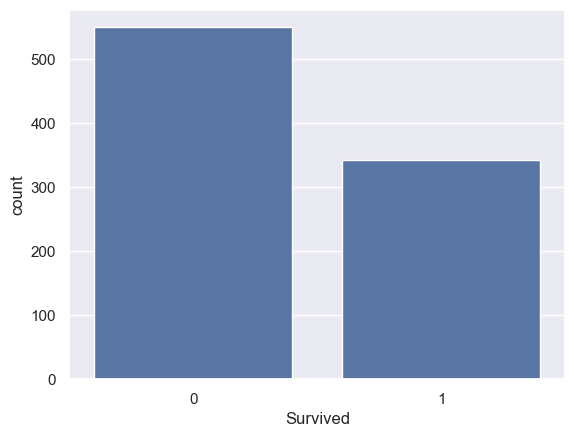

In [140]:
sns.countplot(x = 'Survived', data = data )
plt.show()

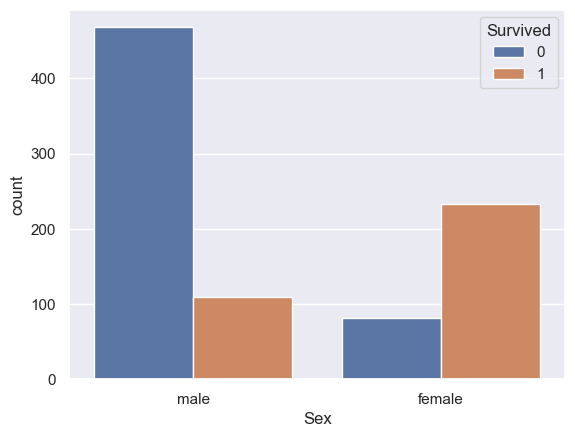

In [141]:
sns.countplot(x = 'Sex', data = data, hue = 'Survived')
plt.show()

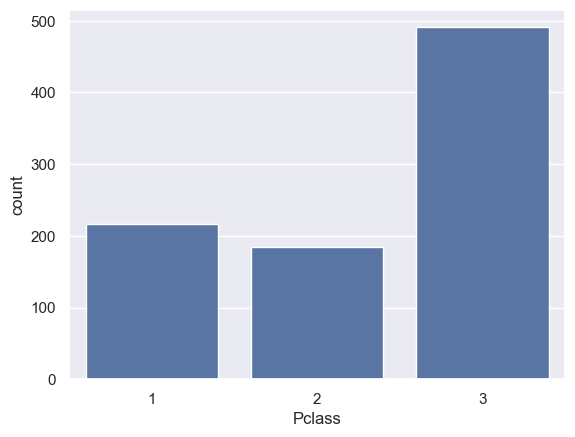

In [142]:
sns.countplot(x = 'Pclass', data = data )
plt.show()

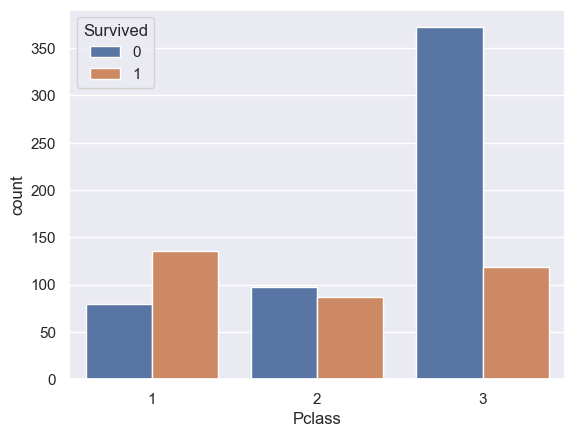

In [143]:
sns.countplot(x = 'Pclass', data = data, hue = 'Survived' )
plt.show()

In [144]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [145]:
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [146]:
data = data.replace({
    "Sex" : {"male" : 0, "female" : 1},
    "Embarked" : {"S" : 0, "C" : 1, "Q" : 2}
})

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [157]:
X = data.drop(columns = ["PassengerId", "Name", "Ticket", "Survived"], axis = 1).values
Y = data["Survived"].values

In [149]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 5)

In [150]:
model = LogisticRegression()

In [151]:
model.fit(xTrain, yTrain)

LogisticRegression()

In [152]:
#Training Evaluation
prediction = model.predict(xTrain)
accuracy = accuracy_score(yTrain, prediction)
print(accuracy)

0.7991573033707865


In [153]:
#Testing Evaluation
prediction = model.predict(xTest)
accuracy = accuracy_score(yTest, prediction)
print(accuracy)

0.7988826815642458


In [160]:
#Predictive System
input = (1, 1, 58, 0, 0, 26.55, 0)

input = np.asarray(input).reshape(1, -1)

prediction = model.predict(input)
print(prediction)

[1]
